In [21]:
import pandas as pd
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
df = pd.read_csv('CoronData/covid_19_data.csv')
df["Country/Region"] = df["Country/Region"].str.replace("Mainland China", "China")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,China,1/22/2020 17:00,1.0,0.0,0.0


In [31]:
def mapTut(df_countries):

    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
    m.drawmapboundary(fill_color='#FFFFFF')

    for index in range(df_countries['Country'].size):
    
        country = df_countries['Country'][index]
        confirmed = df_countries['Confirmed'][index]
        location = geolocator.geocode(country)[1]

        lat, lon = location[0], location[1]
        x, y = m(lon, lat)
        #print(country, confirmed)

        m.plot(x, y, 'r.', markersize=(60.0/67760.0)*confirmed + 15.0)

    plt.title("Geo Plotting")
    plt.show()

def plot_world_by_date(dataFrame1, number):
    # 'number' argument corresponds to how many rows to use
    df2 = dataFrame1.head(number)
    unique_countries = df2['Country/Region'].unique()
    
    l = []

    for country in unique_countries:
        max_value = df2[df2['Country/Region'] == country].Confirmed.max()
        l.append([country, max_value])

    df_countries = pd.DataFrame(l, columns=("Country", "Confirmed"))
    #df_countries.head()
    
    mapTut(df_countries)

/home/bionic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


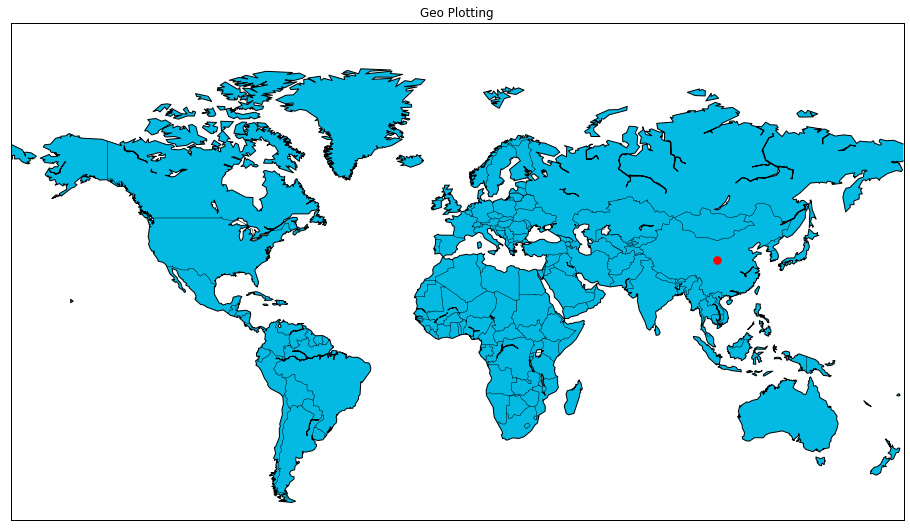

In [33]:
geolocator = Nominatim()
plt.figure(figsize=(16,10))

plot_world_by_date(df, 10)